In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6253,6128-DAFVY,Female,0,No,No,56,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),44.85,2564.95,No
5709,5602-BVFMK,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.30,228.75,No
4705,5760-FXFVO,Male,0,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,494.95,No
4687,3647-GMGDH,Male,0,Yes,No,22,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.70,1914.9,Yes
5291,1334-PDUKM,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,No,Credit card (automatic),86.45,5762.95,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## univariate Analysis

<Axes: xlabel='Churn'>

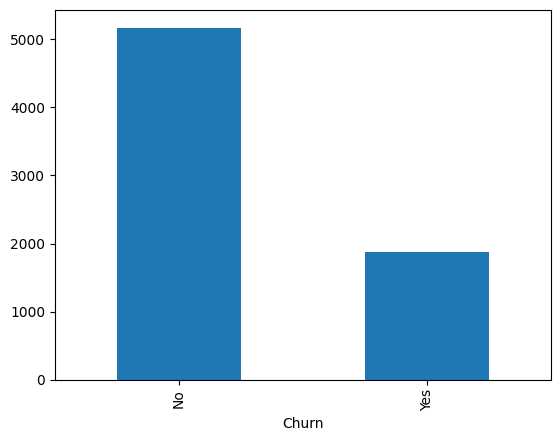

In [10]:
data['Churn'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

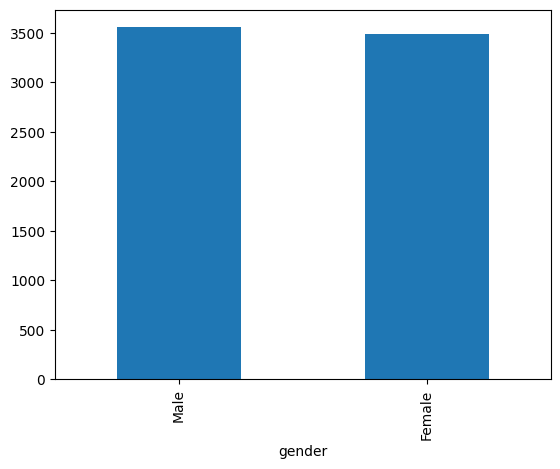

In [11]:
data['gender'].value_counts().plot(kind='bar')

In [12]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
data.drop(columns=['customerID'] , inplace=True)

In [14]:
pd.crosstab(data['Churn'] , data['gender'])

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [15]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [16]:
pd.crosstab(data['Churn'] , data['SeniorCitizen'])

SeniorCitizen,0,1
Churn,,
No,4508,666
Yes,1393,476


<Axes: ylabel='Density'>

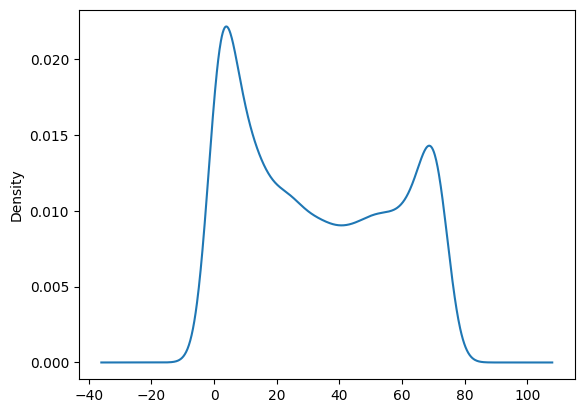

In [17]:
data['tenure'].plot(kind='kde')

In [18]:
data['tenure'].skew()

0.2395397495619829

In [19]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [21]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [22]:
pd.crosstab(data['Churn'] , data['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [23]:
numerical = data.select_dtypes(exclude=['number'])

In [24]:

for col in data.columns:
    if col in numerical:
        print(col , data[col].unique())
        print('-'*50)

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

In [25]:
len(data[data['TotalCharges']==' '])

11

In [26]:
data['TotalCharges'] = data['TotalCharges'].replace(" " ,"0.0")

In [27]:
data['TotalCharges'] = data['TotalCharges'].astype('float32')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
# imbalanced data.
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [30]:
data['numerical_churn'] = data['Churn'].map({'Yes': 1 , 'No' : 0})

<Axes: >

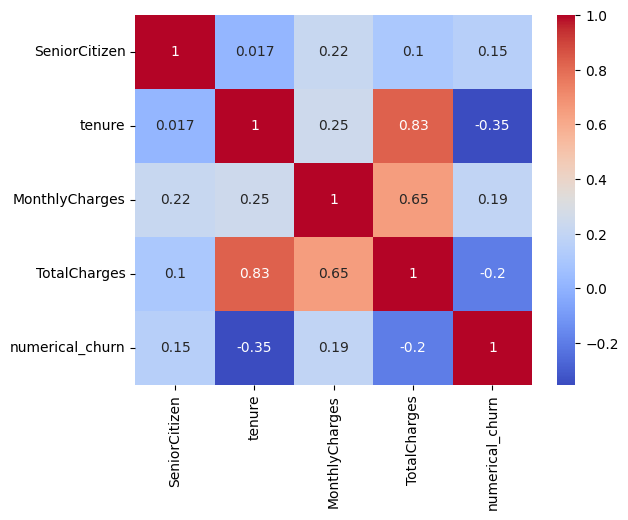

In [31]:
numerical_column = data.select_dtypes(include=['number'])
sns.heatmap(data[numerical_column.columns].corr(), annot=True , cmap='coolwarm')

In [32]:
def plot_histogram(df , col_name):
    plt.figure(figsize=(6 , 5))
    sns.histplot(data[col_name] , kde=True)
    plt.title(f'Distribution of {col_name}')

    col_mean = df[col_name].mean()
    col_median = df[col_name].median()

    plt.axvline(col_mean , color='red' , linestyle='--' , label="mean")
    plt.axvline(col_median , color='green' , linestyle='-' , label="median")

    plt.legend()
    plt.show()

In [33]:
def plot_box(df , col_name):
    plt.figure(figsize=(6 , 5))
    sns.boxplot(y=data[col_name])
    plt.title(f'Distribution of {col_name}')
    plt.ylabel(col_name)
    plt.show()

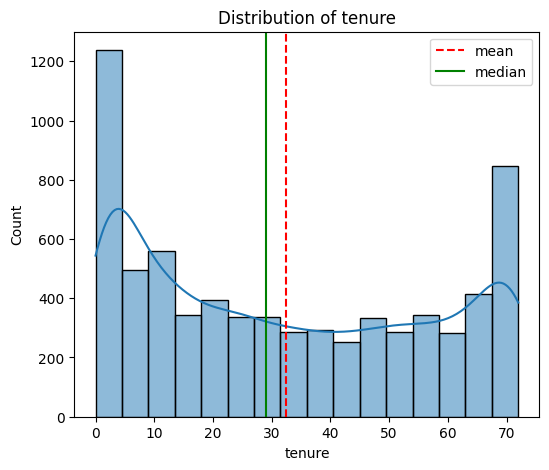

In [34]:
plot_histogram(data , "tenure")

<Axes: xlabel='tenure', ylabel='Count'>

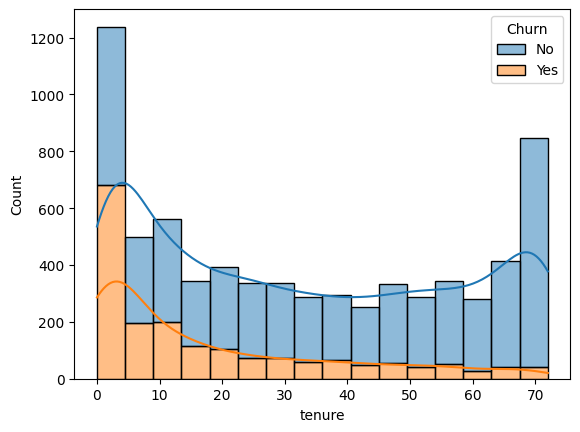

In [35]:
sns.histplot(data=data , x='tenure' , hue='Churn' , kde=True , multiple='stack')

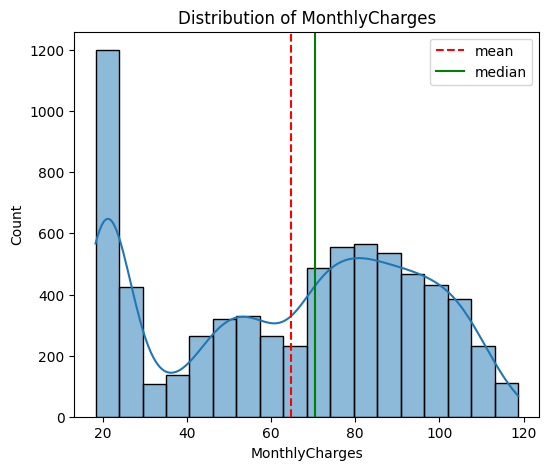

In [36]:
plot_histogram(data , 'MonthlyCharges')

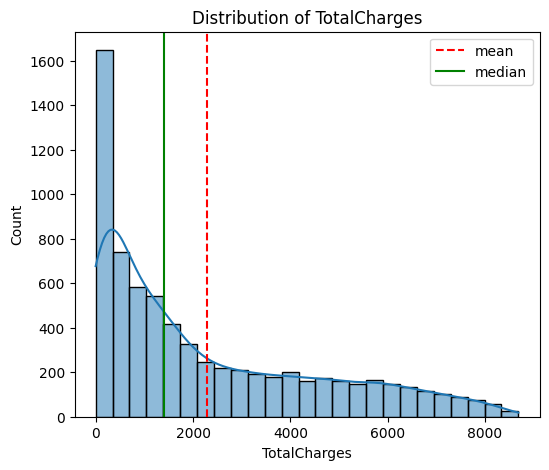

In [37]:
plot_histogram(data , 'TotalCharges')

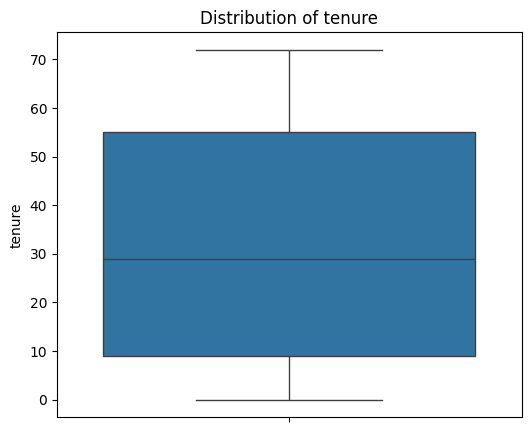

In [38]:
plot_box(data , 'tenure')

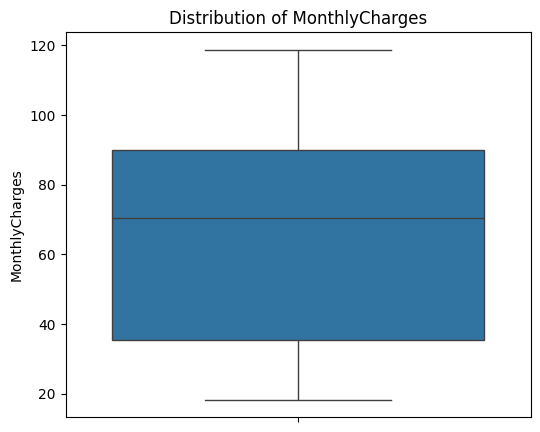

In [39]:
plot_box(data , 'MonthlyCharges')

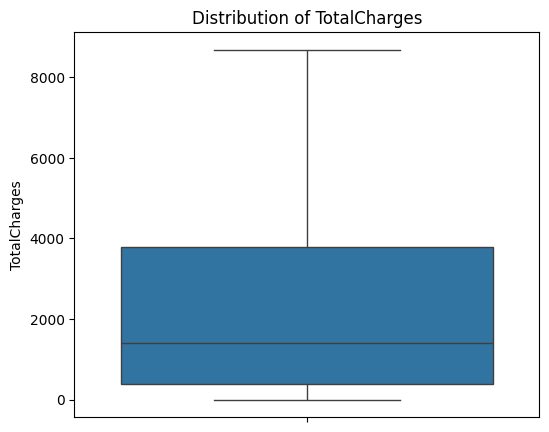

In [40]:
plot_box(data , 'TotalCharges')

In [41]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,numerical_churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,1


In [42]:
data.drop(columns=['Churn'] , inplace=True)

In [43]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numerical_churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [44]:
data['numerical_churn'].value_counts()

numerical_churn
0    5174
1    1869
Name: count, dtype: int64

In [45]:
objects_column = data.select_dtypes(include='object').columns

In [46]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoder = {}

for column in objects_column:
    label = LabelEncoder()
    data[column] = label.fit_transform(data[column])
    encoder[column] = label

with open('encoders.pkl' ,'wb') as f:
    pickle.dump(encoder , f)

In [47]:
data.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numerical_churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750000,0


In [48]:
X = data.drop(columns=['numerical_churn'])

y = data['numerical_churn']

In [49]:
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002


# standardization and model fitting for the logistic regression.

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score ,recall_score , roc_curve , f1_score , confusion_matrix , precision_recall_curve , roc_auc_score)

X_standard = data.drop(columns=['numerical_churn'])
y_standard = data['numerical_churn']


col_to_scale = ['tenure' , 'MonthlyCharges' , 'TotalCharges']

preprocesser = ColumnTransformer(
    transformers=[
        ('num' , StandardScaler(),col_to_scale)
    ], remainder='passthrough'
)

pipe  = Pipeline([
    ('preprocessor' , preprocesser),
    ('model' , LogisticRegression(class_weight='balanced'))
])

X_train , X_test , y_train , y_test = train_test_split(X_standard ,y_standard , test_size=0.2 , random_state=42)

pipe.fit(X_train , y_train)


c:\Users\abish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [57]:
from sklearn.metrics import classification_report

In [58]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



<Axes: >

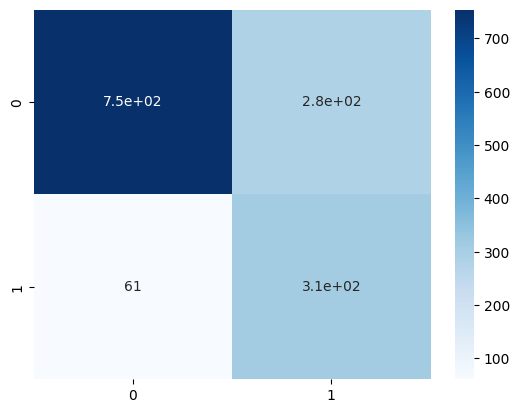

In [59]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , cmap='Blues')

### using smote for imbalance target column and improving the model performance

In [60]:
from imblearn.over_sampling import SMOTE
X_train , X_test , y_train , y_test = train_test_split(X_standard ,y_standard , stratify=y ,  test_size=0.2 , random_state=42)
sm = SMOTE(random_state=42)
X_resm , y_resm = sm.fit_resample(X_train , y_train)

pipe.fit(X_resm , y_resm)


c:\Users\abish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(class_weight='balanced'))])

In [61]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[: , 1]

In [62]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



<Axes: >

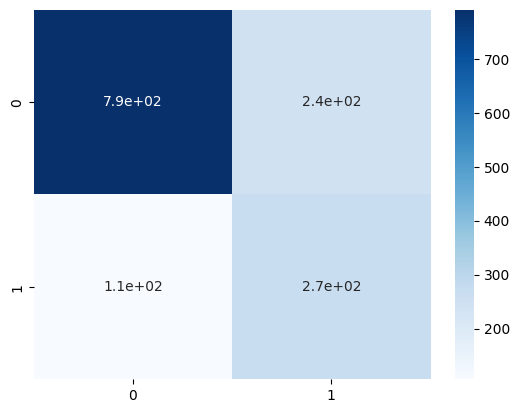

In [63]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , cmap='Blues')

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, 
    confusion_matrix, 
    classification_report, 
    precision_recall_curve, 
    average_precision_score
)
from sklearn.metrics import auc


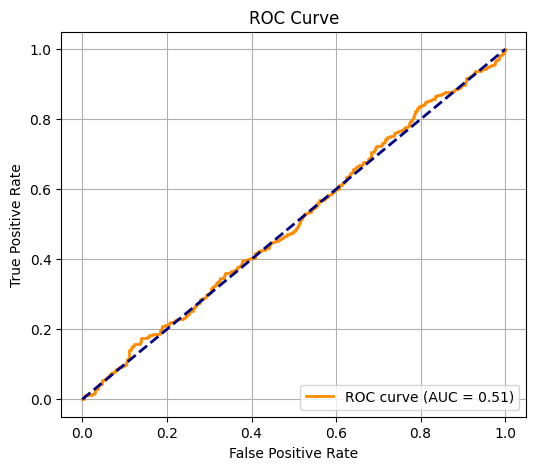

In [68]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

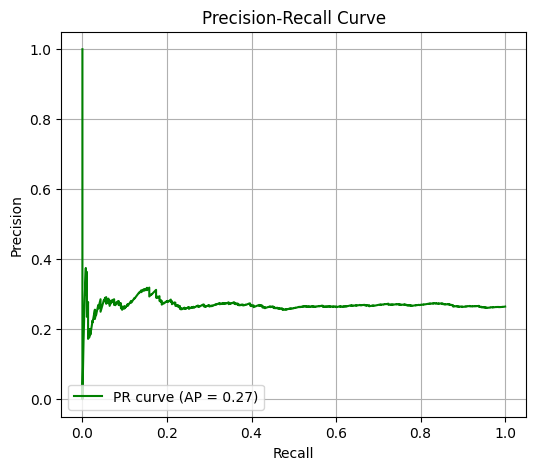

In [69]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()

## Future scope to improve it with the help of ensemble algorithms.